<a href="https://colab.research.google.com/github/swaroop-2007/BackgroundSubtraction/blob/main/Background_Subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00


In [2]:
import cv2
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import yt_dlp

# Download video using yt-dlp
ydl_opts = {'outtmpl': 'bridge_video.mp4'}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=y2zyucfCyjM'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=y2zyucfCyjM
[youtube] y2zyucfCyjM: Downloading webpage
[youtube] y2zyucfCyjM: Downloading ios player API JSON
[youtube] y2zyucfCyjM: Downloading web creator player API JSON
[youtube] y2zyucfCyjM: Downloading player 5f8f5b0f
[youtube] y2zyucfCyjM: Downloading m3u8 information
[info] y2zyucfCyjM: Downloading 1 format(s): 137+251
[download] Destination: bridge_video.mp4.f137.mp4
[download] 100% of   62.28MiB in 00:00:01 at 34.40MiB/s  
[download] Destination: bridge_video.mp4.f251.webm
[download] 100% of    2.03MiB in 00:00:00 at 16.55MiB/s  
[Merger] Merging formats into "bridge_video.mp4.mkv"
Deleting original file bridge_video.mp4.f251.webm (pass -k to keep)
Deleting original file bridge_video.mp4.f137.mp4 (pass -k to keep)


In [4]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [5]:
!ffmpeg -ss 00:00:14 -i bridge_video.mp4.mkv -to 00:00:18 -c copy -strict -2 bridgeClipped.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

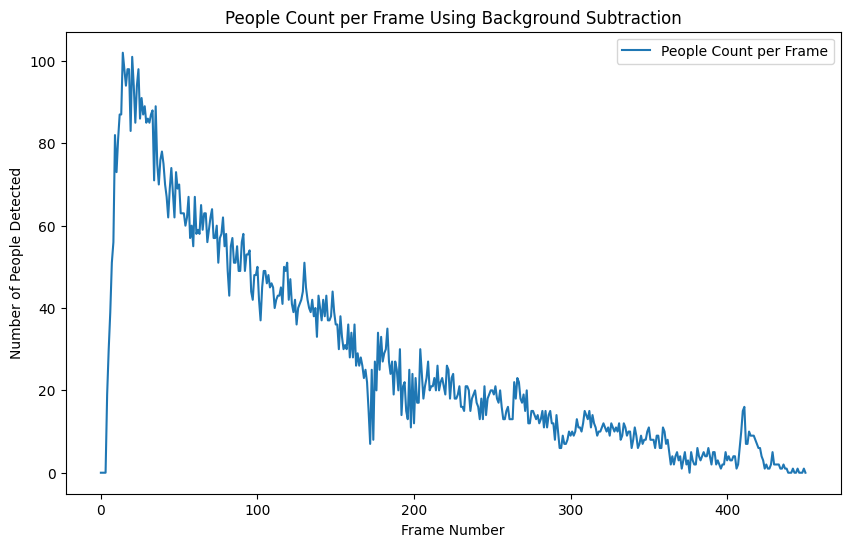

Estimated total number of people in the clipped video (via background subtraction): 12466


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def background_subtraction(clipped_video_path):
    cap = cv2.VideoCapture(clipped_video_path)
    backSub = cv2.createBackgroundSubtractorKNN(detectShadows=True)

    total_people_count = 0
    frame_count = 0
    people_counts_per_frame = []
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        fg_mask = backSub.apply(frame)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        people_in_frame = 0
        for contour in contours:

            if 500 < cv2.contourArea(contour) < 5000:
                people_in_frame += 1

        total_people_count += people_in_frame
        frame_count += 1
        people_counts_per_frame.append(people_in_frame)

    cap.release()

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(people_counts_per_frame)), people_counts_per_frame, label="People Count per Frame")
    plt.xlabel('Frame Number')
    plt.ylabel('Number of People Detected')
    plt.title('People Count per Frame Using Background Subtraction')
    plt.legend()
    plt.show()

    return total_people_count


clipped_video_path = "bridgeClipped.mp4"
people_count_estimate = background_subtraction(clipped_video_path)
print(f"Estimated total number of people in the clipped video (via background subtraction): {people_count_estimate}")


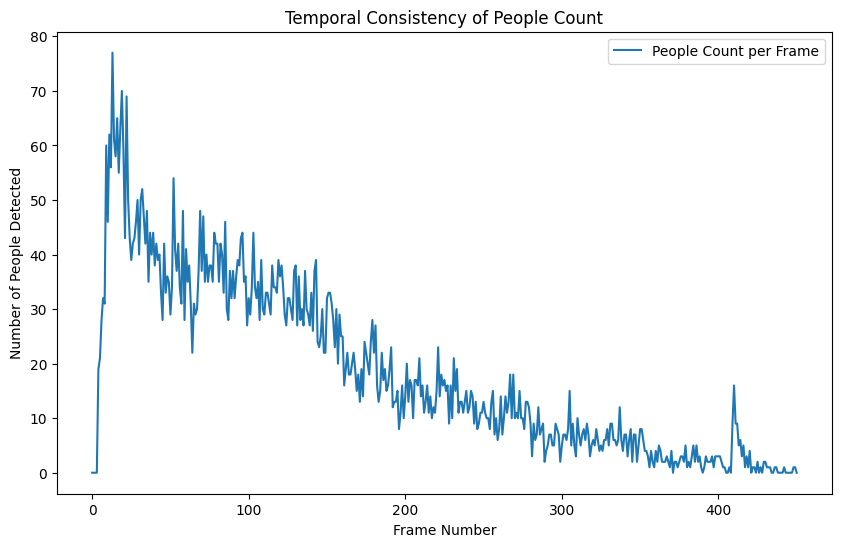

Estimated total number of people in the clipped video (via temporal consistency): 8246


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def check_overlap(box1, box2, threshold=0.5):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    xi_min = max(x1_min, x2_min)
    yi_min = max(y1_min, y2_min)
    xi_max = min(x1_max, x2_max)
    yi_max = min(y1_max, y2_max)

    intersection_area = max(0, xi_max - xi_min) * max(0, yi_max - yi_min)

    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0

    return iou > threshold

def validate_with_temporal_consistency_and_plot(video_path, frame_sample_rate=1, overlap_threshold=0.7):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    backSub = cv2.createBackgroundSubtractorKNN(detectShadows=True)

    total_people_count = 0
    frame_count = 0
    previous_boxes = []

    people_counts_per_frame = []

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        fg_mask = backSub.apply(frame)

        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        current_boxes = []
        people_in_frame = 0

        for contour in contours:
            if 500 < cv2.contourArea(contour) < 5000:
                x, y, w, h = cv2.boundingRect(contour)
                current_boxes.append([x, y, x + w, y + h])

        unique_people_in_frame = 0
        for curr_box in current_boxes:
            is_unique = True
            for prev_box in previous_boxes:
                if check_overlap(curr_box, prev_box, overlap_threshold):
                    is_unique = False
                    break
            if is_unique:
                unique_people_in_frame += 1

        total_people_count += unique_people_in_frame
        people_counts_per_frame.append(unique_people_in_frame)  # Store people count for each frame
        frame_count += 1

        previous_boxes = current_boxes

    cap.release()

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(people_counts_per_frame)), people_counts_per_frame, label="People Count per Frame")
    plt.xlabel('Frame Number')
    plt.ylabel('Number of People Detected')
    plt.title('Temporal Consistency of People Count')
    plt.legend()
    plt.show()

    return total_people_count

video_path = "bridgeClipped.mp4"
people_count_estimate = validate_with_temporal_consistency_and_plot(video_path)
print(f"Estimated total number of people in the clipped video (via temporal consistency): {people_count_estimate}")
